In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance


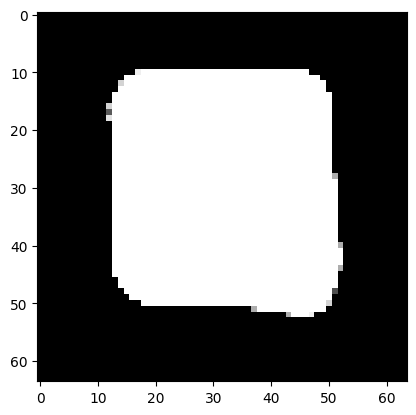

In [2]:
img = cv2.imread("ctverec.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# enhance
img_pil = Image.fromarray(img_gray)
img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
img = np.array(img_pil)

imshow(img, cmap="gray")


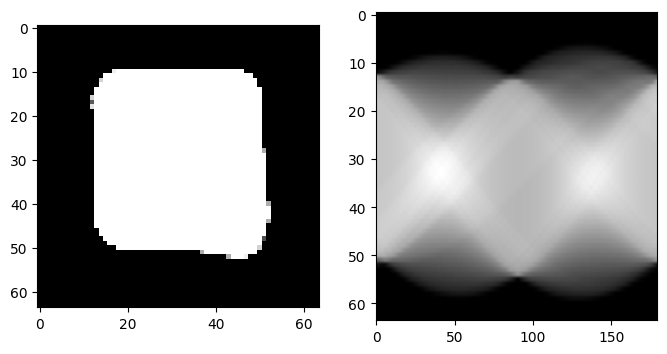

In [3]:
from skimage.transform import radon

# Perform Radon transform
theta = np.linspace(0.0, 180.0, 180, endpoint=False)
sinogram = radon(img, theta=theta, circle=True)

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
imshow(img, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(sinogram, cmap="gray", aspect="auto")
plt.show()


In [4]:
def get_pos_angle(sinogram):
    pos, angle = np.unravel_index(np.argmax(sinogram, axis=None), sinogram.shape)

    return pos, angle


In [5]:
def get_vectors(pos, angle):
    vector = np.array([np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))])
    unit_vector = vector / np.linalg.norm(vector)
    unit_vector

    normal_vector = np.array([-unit_vector[1], unit_vector[0]])
    normal_vector

    return unit_vector, normal_vector


In [6]:
def graph(sinogram, pos, angle, img_rgb, img):
    plt.figure(figsize=(16, 5))

    plt.subplot(1, 3, 1)
    imshow(img_rgb)
    plt.title("Image with Line")

    plt.subplot(1, 3, 2)
    plt.imshow(sinogram, cmap="gray", aspect="auto")
    plt.title("Sinogram")

    plt.subplot(1, 3, 3)
    plt.imshow(img, cmap="gray", aspect="auto")

    plt.subplot(1, 3, 2)
    plt.plot(-sinogram[pos] + 70)

    plt.axhline(y=pos, color="r", linestyle="--")
    plt.axvline(x=angle, color="r", linestyle="--")

    plt.show()


In [7]:
import math


def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy


(36.088586124226865, 63.75347954956716)
33 41


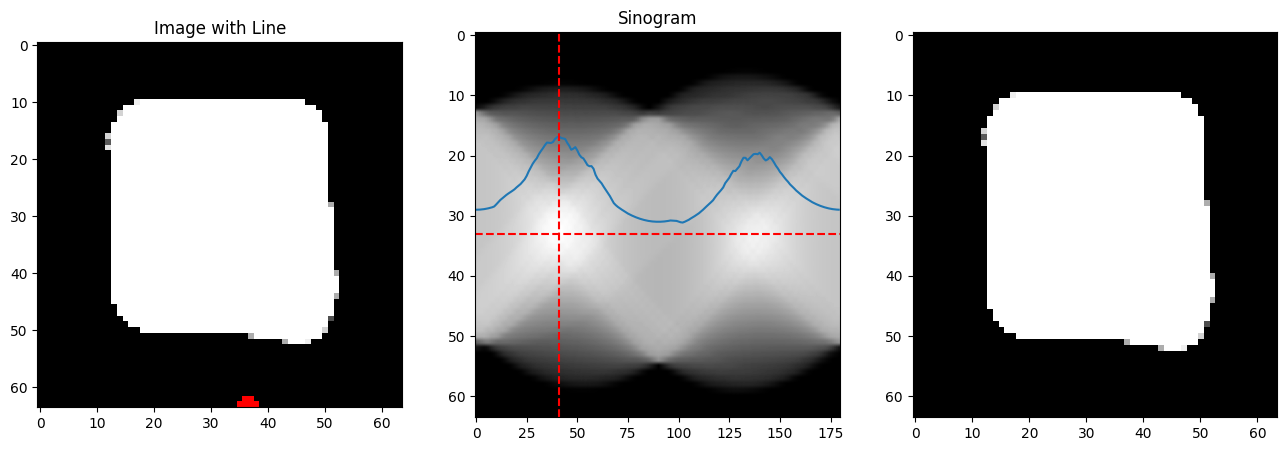

In [12]:
sinogram = radon(img, theta=theta, circle=True)
pos, angle = get_pos_angle(sinogram)

vec = rotate([32, 32], [pos, 0], -angle)

directional_vector = np.array([np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))])
directional_vector = directional_vector / np.linalg.norm(directional_vector)

img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
print(vec)

vec = np.array([int(vec[0]), int(vec[1])])
end = vec + directional_vector * 100
end = np.array(end, dtype=np.uint8)


cv2.line(img_rgb, vec, end, (255, 0, 0), 2)
img = cv2.line(img, vec, end, 0, 2)


print(pos, angle)


graph(sinogram, pos, angle, img_rgb, img)
